In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the dataset
df = pd.read_csv("Sales.csv")

In [3]:
# Display the first ten rows
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
# Display the last rows
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
# Describe the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Get the shape of the dataset
df.shape

(200, 4)

In [7]:
# Get the size of the dataset
df.size

800

In [8]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# Check for null values
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [11]:
# Total null values
df.isnull().sum().sum()

0

In [12]:
# Get the columns
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

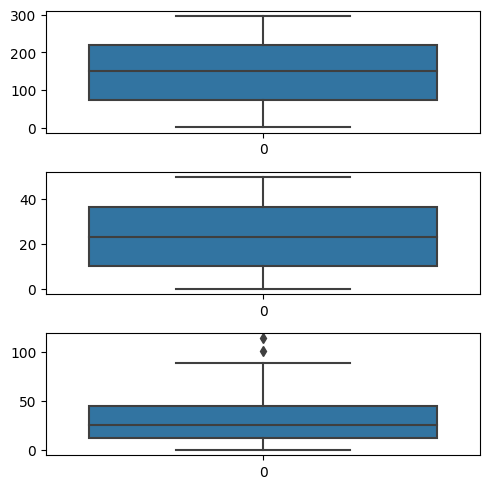

In [15]:
# Visualize outliers using box plots
fig, axis = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(df['TV'], ax=axis[0])
plt2 = sns.boxplot(df['Radio'], ax=axis[1])
plt3 = sns.boxplot(df['Newspaper'], ax=axis[2])
plt.tight_layout()

In [16]:
# Assign variables for feature engineering
x1 = df["TV"]
x2 = df["Newspaper"]
x3 = df["Radio"]
y = df["Sales"]

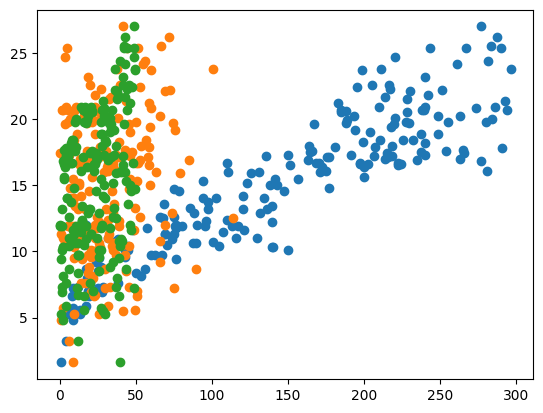

In [17]:
# Plotting the original features
plt.scatter(x1, y)
plt.scatter(x2, y)
plt.scatter(x3, y)

In [18]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
x1 = np.array(x1).reshape(-1, 1)
x2 = np.array(x2).reshape(-1, 1)
scaler_x1 = StandardScaler().fit(x1)
scaler_x2 = StandardScaler().fit(x2)
x1_scaled = scaler_x1.transform(x1)
x2_scaled = scaler_x2.transform(x2)

In [20]:
# Feature Engineering
# 1. Interaction Features
df['TV_Radio'] = df['TV'] * df['Radio']
df['TV_Newspaper'] = df['TV'] * df['Newspaper']
df['Radio_Newspaper'] = df['Radio'] * df['Newspaper']


In [22]:
# 2. Polynomial Features (for example, quadratic features)
df['TV^2'] = df['TV']**2
df['Radio^2'] = df['Radio']**2
df['Newspaper^2'] = df['Newspaper']**2

In [23]:
# 3. Log Transformation (if the distribution is skewed)
df['TV_log'] = np.log(df['TV'])
df['Radio_log'] = np.log(df['Radio'])
df['Newspaper_log'] = np.log(df['Newspaper'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
#linear regression
#importing linear regression library
from sklearn.linear_model import LinearRegression
#train test split
from sklearn.model_selection import train_test_split

In [25]:
# Split the data into training and testing sets
X = np.column_stack((x1, x2, x3))  # Use the features you want to include
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
# Print the model's performance metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 2.907756910271091
R-squared (R2) Score: 0.9059011844150826


In [30]:
#the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.05450927 0.00433665 0.10094536]
Intercept: 4.714126402214129
